### Petfinder API

In [2]:
import requests_cache
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('ggplot')
requests_cache.install_cache('pet_cache')

In [152]:
key = "12345" #get your own key!

In [4]:
## Specify parameters
params = {'key': key, 'animal': 'dog', 'format': 'json'}

In [5]:
## Specify method URL
breed_url = "http://api.petfinder.com/breed.list"

These are combined to make the request using ``requests.get``.  

In [8]:
req = requests.get(breed_url,params=params)

In [156]:
req.url # look at url

'http://api.petfinder.com/breed.list?animal=dog&format=json&key=12345'

In [9]:
js = req.json() # parse the JSON

print(js.__repr__()[0:300])

{'@encoding': 'iso-8859-1', '@version': '1.0', 'petfinder': {'@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance', 'breeds': {'breed': [{'$t': 'Affenpinscher'}, {'$t': 'Afghan Hound'}, {'$t': 'Airedale Terrier'}, {'$t': 'Akbash'}, {'$t': 'Akita'}, {'$t': 'Alaskan Malamute'}, {'$t': 'American Bu


In [25]:
req.status_code

200

In [27]:
print(js.keys())

dict_keys(['@encoding', '@version', 'petfinder'])


In [28]:
js['petfinder'].keys()

dict_keys(['@xmlns:xsi', 'breeds', 'header', '@xsi:noNamespaceSchemaLocation'])

In [10]:
js['petfinder']['breeds'].keys()

dict_keys(['breed', '@animal'])

In [12]:
## Extract dog breeds
breeds = [b['$t'] for b in js['petfinder']['breeds']['breed']]

In [14]:
len(breeds)

257

In [13]:
print(", ".join(breeds[:30]))

Affenpinscher, Afghan Hound, Airedale Terrier, Akbash, Akita, Alaskan Malamute, American Bulldog, American Eskimo Dog, American Foxhound, American Hairless Terrier, American Staffordshire Terrier, American Water Spaniel, Anatolian Shepherd, Appenzell Mountain Dog, Australian Cattle Dog / Blue Heeler, Australian Kelpie, Australian Shepherd, Australian Terrier, Basenji, Basset Hound, Beagle, Bearded Collie, Beauceron, Bedlington Terrier, Belgian Shepherd / Laekenois, Belgian Shepherd / Malinois, Belgian Shepherd / Sheepdog, Belgian Shepherd / Tervuren, Bernese Mountain Dog, Bichon Frise


The Petfinder API also includes a ``pet.getRandom`` method which allows one to randomly sample the database for a pet with a specific breed.

In [16]:
pet_url_ex = "http://api.petfinder.com/pet.getRandom"
randomparms = {'key':key,'animal':'dog','format':'json','output':'basic'}
randreq = requests.get(pet_url_ex,params = randomparms)
js = randreq.json()

In [18]:
print(js['petfinder'].__repr__()[0:700])

{'pet': {'options': {'option': [{'$t': 'altered'}, {'$t': 'hasShots'}, {'$t': 'housetrained'}]}, 'status': {'$t': 'A'}, 'contact': {'phone': {'$t': '210-535-5480'}, 'state': {'$t': 'TX'}, 'address2': {'$t': 'P.O. Box 743'}, 'email': {'$t': 'teresakopacki@gmail.com'}, 'city': {'$t': 'Lytle'}, 'zip': {'$t': '78052'}, 'fax': {}, 'address1': {'$t': '17971 W. FM 2790 S.'}}, 'age': {'$t': 'Adult'}, 'size': {'$t': 'S'}, 'media': {'photos': {'photo': [{'@size': 'pnt', '$t': 'http://photos.petfinder.com/photos/pets/40700638/1/?bust=1516246159&width=60&-pnt.jpg', '@id': '1'}, {'@size': 'fpm', '$t': 'http://photos.petfinder.com/photos/pets/40700638/1/?bust=1516246159&width=95&-fpm.jpg', '@id': '1'}, {'


In [24]:
def print_pet(js):
    """
    Input: Petfinder JSON object from getRandom method
    Output: String describing the pet
    """
    breed_obj = js[u'petfinder'][u'pet'][u'breeds'][u'breed']
    if type(breed_obj) == list:
        breeds = [a[u'$t'] for a in breed_obj]
        breed = ", ".join(breeds) + " mix"
    else:
        breed = breed_obj[u'$t']
    name = js[u'petfinder'][u'pet'][u'name'][u'$t']
    desc = js[u'petfinder'][u'pet'][u'description'][u'$t']
    return "{} is a {}. {}".format(name,breed,desc)

In [40]:
print(print_pet(js))

Murray is a Rat Terrier. Meet MURRAY!!

Murray is an approximately 2 year old, 18-20 pound, neutered, male terrier mix breed. Possibly a Rat Terrier blend.

Murray was originally found as a stray and was in a semi-rural outdoor shelter near Lytle. The ACO reached out to us and we happily brought Murray into our program.

Murray is a gentlemanly little guy. He is very social, but generally minds his own business, and likes to be active. Murray is a chunky guy and needs an active person to help get him fit. He does well with the other dogs in his foster home, but does not like other pushy or bossy males picking on him. He has not shown alot of interest in cats, but as a typical terrier may give chase. He is crate trained and does his business outside when kept on a consistent schedule. Murray is loyal and loves his people.

Murray is heartworm negative, up to date on vaccinations, is current on flea and heartworm preventive, and is micro-chipped. He comes with a health certificate if tra

In [20]:
image_recs = js[u'petfinder'][u'pet'][u'media'][u'photos'][u'photo']
image_recs[0]

{'@size': 'pnt',
 '$t': 'http://photos.petfinder.com/photos/pets/40700638/1/?bust=1516246159&width=60&-pnt.jpg',
 '@id': '1'}

In [21]:
from IPython.display import HTML

In [22]:
def display_pet(js):
    """
    Input: petfinder json object
    Output: html string with image
    """
    try:
        image_recs = js[u'petfinder'][u'pet'][u'media'][u'photos'][u'photo']
    except KeyError:
        return ""
    for rec in image_recs:
        image_uri = rec['$t']
        if rec['@size'] == u'x':
            break
    return "<center><img src='{}'></center>".format(image_uri)

In [25]:
HTML(display_pet(js) + "<pre>" + print_pet(js) + "</pre>") 

Let's streamline this process with the following function.

In [26]:
def random_dog(key):
    """
    Input: api key
    Output: HTML description of the dog
    """
    pet_url_ex = "http://api.petfinder.com/pet.getRandom"
    randomparms = {'key':key,'animal':'dog','format':'json','output':'basic'}
    randreq = requests.get(pet_url_ex,params = randomparms)
    js = randreq.json()
    return js

In [27]:
with requests_cache.disabled():
    js = random_dog(key)
HTML(display_pet(js) + "<pre>" + print_pet(js) + "</pre>") 

Now we are ready to get a random sample of the dataset.  This should only be done sparingly because it will make many requests to the webserver in a short period of time.  Many APIs including the petfinder API have rate limits that restrict the number of queries a single key can make.

In [30]:
## Make 500 requests to the petfinder API of random dogs
samp_size = 500

with requests_cache.disabled():
    dog_data = [random_dog(key) for s in range(samp_size)]

In [31]:
def extract_breeds(pet):
    """Extract the breed information for petfinder json"""
    try:
        breed_obj = pet[u'breeds'][u'breed']
        if type(breed_obj) == list:
            breeds = [a[u'$t'] for a in breed_obj]
        else:
            breeds = [breed_obj[u'$t']]
        return breeds
    except KeyError:
        return None

In [32]:
def catch_missing(var_dict,key):
    """Catch missingness in a variable and return None"""
    try:
        var = var_dict[key]['$t']
        return var
    except KeyError:
        return None

In [33]:
def extract_pet_vars(js):
    """Extract the desired variables from petfinder json"""
    pet = js['petfinder']['pet']
    pet_breeds = extract_breeds(pet)
    pet_cont = pet['contact']
    pet_state = catch_missing(pet_cont,'state')
    pet_age = catch_missing(pet,'age')
    pet_size = catch_missing(pet,'size')
    pet_id = int(catch_missing(pet,'id'))
    pet_desc = catch_missing(pet,'description')
    pet_shelterId = catch_missing(pet,'shelterId')
    return {'breeds':pet_breeds, 'state':pet_state, 'age':pet_age, 'size':pet_size, 'id':pet_id, 
           'desc': pet_desc, 'shelter_id': pet_shelterId}

In [34]:
extract_pet_vars(js)

{'breeds': ['Great Pyrenees'],
 'state': 'NC',
 'age': 'Baby',
 'size': 'L',
 'id': 43203450,
 'desc': 'This is Snowman he is a 10 month old Great  Pyrenees that now needs a new home through no fault of his. He is house trained current on shots and still does dumb puppy things. Snowman needs a home that will continue his training and be able to provide lots of hugs and belly rubs.',
 'shelter_id': 'NC820'}

In [35]:
dog_df = pd.DataFrame(extract_pet_vars(js) for js in dog_data)

dog_df = dog_df.set_index('id')

In [36]:
dog_df.describe()

,age,breeds,desc,shelter_id,size,state
count,500,500,447,500,500,500
unique,4,215,438,440,4,49
top,Adult,[Pit Bull Terrier],No Notes,IL192,M,TX
freq,236,51,4,4,245,74


In [37]:
dog_df.groupby('age').describe()

breeds                                    desc         \
        count unique                   top freq count unique   
age                                                            
Adult     236    113    [Pit Bull Terrier]   28   213    208   
Baby       80     60  [Labrador Retriever]    8    73     73   
Senior     48     32           [Chihuahua]    9    45     45   
Young     136     79    [Pit Bull Terrier]   15   116    114   

                                                               shelter_id  \
                                                      top freq      count   
age                                                                         
Adult                                            No Notes    4        236   
Baby    Meet Cosmo! Cosmo is a 6 month old Beagle/Houn...    1         80   
Senior  HIGHLY ADOPTABLE!!! ROSIE is a Jack Russell Te...    1         48   
Young   Craigie D Boss came to us from a kill shelter ...    3        136   

                           size                 state                  
       unique    top freq count unique top freq count unique top freq  
age                                                                    
Adult     223   TN75    2   236      4   M  100   236     43  TX   31  
Baby       77  MN289    2    80      4   M   47    80     31  TX   10  
Senior     45  NV200    2    48      4   S   22    48     23  CA    7  
Young     129  IN434    3   136      3   M   84   136     31  TX   27

In [109]:
from collections import Counter

all_breeds = Counter(sum(dog_df['breeds'].values,[]))

In [113]:
all_breeds.most_common()[:5]

[('Labrador Retriever', 89),
 ('Pit Bull Terrier', 76),
 ('Mixed Breed', 67),
 ('Chihuahua', 37),
 ('Shepherd', 26)]

In [116]:
max(len(br) for br in dog_df['breeds'].values)

2

In [117]:
## Encode breeds into two vars

dog_df['breed1'] = [br[0] for br in dog_df['breeds'].values]
dog_df['breed2'] = [br[-1] for br in dog_df['breeds'].values]

In [126]:
lab_dogs = dog_df.query('breed1 == "{0}" or breed2 == "{0}"'.format("Labrador Retriever"))
lab_dog = lab_dogs.iloc[0,:]

In [127]:
lab_dog

age                                                       Adult
breeds                                     [Labrador Retriever]
desc          This is the Animal Description Header\nRover i...
shelter_id                                                CA387
size                                                          L
state                                                        CA
breed1                                       Labrador Retriever
breed2                                       Labrador Retriever
Name: 42874092, dtype: object

In [129]:
print(lab_dog['desc'])

This is the Animal Description Header
Rover is all dog, hence the name! He loves people and is very confident and playful in his surroundings. He will need some training since he can be mouthy in play and is jumpy with excitement when meeting new people. Rover is a hunting stock kind of Lab mix, lanky and energetic - he needs space and adventures!; This is a high energy boy who will need and love lots of exercise. He will make an excellent dog for outdoorsy folks who have the time and sense of adventure to go on long hikes, to do some training and recall work - he'll likely be really good and he does want to please - but he needs an outlet for his enthusiasm!This is the Animal Description Footer
10/23/18 2:49 AM


In [132]:
dog_df.groupby('state').count().sort_values('age',ascending=False).iloc[:5,0]

state
TX    75
CA    55
FL    30
GA    28
OH    19
Name: age, dtype: int64

In [136]:
pitt_dog = dog_df.query('state == "TX" and breed1 == "Pit Bull Terrier"').iloc[0,:]

In [137]:
pitt_dog

age                                                       Adult
breeds                                       [Pit Bull Terrier]
desc          I'm a petite little lady who loves to give kis...
shelter_id                                                TX198
size                                                          M
state                                                        TX
breed1                                         Pit Bull Terrier
breed2                                         Pit Bull Terrier
Name: 41596889, dtype: object

In [139]:
pitt_dog['desc']

"I'm a petite little lady who loves to give kisses! I'm sweet and enjoy lots of belly rubs, and I'm also a pretty amazing athlete! I like playing with toys, going for runs, and sleeping next you once I'm all tuckered out. I would prefer to have all your attention to myself, so I'd do best an only pet - I'm such a good girl, I'm the only companion you need! Primary Color: Black Secondary Color: White Weight: 43.4lbs Age: 3yrs 11mths 1wks Animal has been Spayed"

## Relational Databases

### Relational Database Management Systems (RDBMS)

Relational database management systems (RDBMS) is a database system that is based on the relational model of <a href="http://www.seas.upenn.edu/~zives/03f/cis550/codd.pdf">Codd, "A Relational Model of Data for Large Shared Data Banks", 1970.</a>

- a computer application that stores data in a structured way, and allows users to interact with that data.
- organizes the data in tables

A few fundamental properties of the relational model (from Codd 1970):

1. Each row is an n-tuple
2. The ordering or rows is unimportant
3. The rows are distinct
4. The ordering of columns is significant because each corresponds to a unique attribute
5. Each column has a descriptive name

The main advantage of having a separate language SQL that works over many RDBMSs is that we can write code that works regardless of the database engine.

The paper, Codd 1970, begins with the following,

> "Future users of large data banks must be protected from
having to know how the data is organized in the machine (the
internal representation). A prompting service which supplies
such information is not a satisfactory solution. Activities of users
at terminals and most application programs should remain
unaffected when the internal representation of data is changed
and even when some aspects of the external representation
are changed." Codd 1970.

  The top RDBMSs are 
  - Oracle Database, 
  - Microsoft SQL Server, 
  - MySQL,
  - SQLite

### Structured Query Language (SQL)

SQL is a declarative language in that it is based on logical statements that are interpreted by the RDBMS.

You can create a table with the code,

```
create table animals (
    name text,
    species text,
    age integer,
    shelter_id integer)
```
- generate an empty table called animals that has 4 columns.

### Basic commands

You can then insert rows into the table with
```
insert into animals values ("Emmy", "dog", 1, "CA")
```

Furthermore, we can retrieve records with the select statement by
```
select * from animals
```
which will return the entire animals table.

### Functions and Clauses

You can add a "where" clause to the select statement: 
```
select * from animals where species="dog"
```
This will select only the records with the species set to 'dog'.
Other operators can be used, such as ``=,<,>,!=,between,like,in,is not null, as``, where 'like' will match patterns for text, and 'as' can change a field name in the select statement.

You can apply functions and select specific columns with the select statement as in 
```
select name, log(age + 1) from animals
```    
Moreover, there are aggregating functions such as in 
```
select count(*) from animals
```
which will return the number of records.

### Functions and Clauses

The group by clause, as in 
```
select avg(age), count(*) from animals group by species
```
will group the records by species and then apply aggregations within the groups.
Another common clause is the order by clause as in 
```
select name from animals where species="dog" order by age
```
will return the dogs in ascending order of age.
The groupby and aggregation operations are already familiar to those familiar with Pandas.  You should think of the SQL grammar as the basis for the interface to DataFrames.

### Other statements

Other statements: ``insert, update, alter table, drop table``.

- With insert you can add records, and update will let you modify records.
- With alter table you can add and drop columns, and drop table will remove the table all together.

In day to day operations of data scientists, select statements are extremely common, where modifications to existing tables are done offline in scripts.
In this lesson we will use pandas to construct the table and make the sql select statements.

### Joins tables

We have already talked about joining tables.
To see the animals in a county, then we will need to join these tables.
We can do this by
```
select * from animals join shelters on animals.shelter_id = shelters.id
```
Outer join is done by 
```
select * from animals outer join shelters on animals.shelter_id = shelters.id
```
inner join is similar.

### Pandas and SQLAlchemy

- The sqlalchemy package provide a unified way to interact with many different RDBMSs.
- You have to begin by initializing the connection to a database, which is done by the <code>create_engine</code> command.

```
from sqlalchemy import create_engine
    disk_engine = create_engine('sqlite:///pets.sqlite')
```

- creates the connection to the sqlite file that will contain your database.
- you can use the methods: <code>pd.to_sql, pd.read_sql_query</code>.
- A typical way to use pandas then would be to construct the table in chunks and write to the database.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import sqlalchemy as sqla
plt.style.use('ggplot')

### Reading in chunks with Pandas

- set ``chunksize`` to create a DataFrameReader
- Iterable which returns the file in sequence
- Work on first chunk to convert to table

In [4]:
nycjobs_reader = pd.read_csv('/home/jsharpna/Documents/DataTech/book/unit2/data/DOB_Job_Application_Filings.csv',
                             chunksize=10000,low_memory=False,encoding='latin-1')

In [5]:
nycjobs_chunk = next(nycjobs_reader)
nyc_cols = nycjobs_chunk.columns
nycjobs_chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 96 columns):
Job #                            10000 non-null int64
Doc #                            10000 non-null int64
Borough                          10000 non-null object
House #                          10000 non-null object
Street Name                      10000 non-null object
Block                            9998 non-null float64
Lot                              9998 non-null float64
Bin #                            10000 non-null int64
Job Type                         10000 non-null object
Job Status                       10000 non-null object
Job Status Descrp                10000 non-null object
Latest Action Date               10000 non-null object
Building Type                    10000 non-null object
Community - Board                10000 non-null int64
Cluster                          9177 non-null object
Landmarked                       9817 non-null object
Adult Estab       

In [12]:
nycjobs_chunk.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
1610000,301919020,1,BROOKLYN,25,COLUMBIA HEIGHTS,204.0,1.0,3001479,A2,X,...,N,NaN,O6,0,40.702030,-73.994550,33.0,1.0,Brooklyn Heights-Cobble Hill,3001479.0
1610001,301919057,1,BROOKLYN,611,GRAND STREET,2780.0,29.0,3069362,A3,X,...,N,NaN,C7,0,40.711288,-73.947734,34.0,503.0,East Williamsburg,3069362.0
1610002,301919075,1,BROOKLYN,2749,PITKIN AVENUE,4215.0,43.0,3094732,A2,X,...,N,NaN,S2,0,40.675600,-73.870623,42.0,1196.0,East New York,3094732.0
1610003,301919538,1,BROOKLYN,293,STERLING PLACE,1165.0,73.0,3029135,A2,R,...,N,NaN,C0,0,40.675668,-73.968318,35.0,207.0,Prospect Heights,3029135.0
1610004,301919100,1,BROOKLYN,735,MCDONALD AVENUE,5385.0,60.0,3348192,A1,R,...,N,NaN,E1,0,40.636280,-73.978198,39.0,486.0,Kensington-Ocean Parkway,3348192.0


In [8]:
## Create database engine
sqlite_file = 'nycjobs.sqlite'
nyc_conn = sqla.create_engine('sqlite:///' + sqlite_file)

In [9]:
## Fill in dataframe
nycjobs_chunk.to_sql('jobs',nyc_conn,if_exists='replace')
for nycjobs_chunk in nycjobs_reader:
    nycjobs_chunk.to_sql('jobs',nyc_conn,if_exists='append')

In [10]:
## count all records
pd.read_sql_query("select count(*) from jobs",nyc_conn)

,count(*)
0,1616028


In [11]:
## where statement filters
pd.read_sql_query("select count(*) from jobs where Plumbing='X'",nyc_conn)

,count(*)
0,533498


In [13]:
## groupby operation
pd.read_sql_query("select Plumbing, count(*) as count from jobs group by Plumbing",nyc_conn)

,Plumbing,count
0,None,1082530
1,X,533498


In [14]:
## Multiline query
sql_query = """
select * from jobs 
where Plumbing='X' 
order by "Initial Cost" desc
limit 5000
"""
plumbing = pd.read_sql_query(sql_query,nyc_conn)

In [15]:
plumbing.head()

,index,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,874889,120653417,1,MANHATTAN,1817,2ND AVE,1540.0,22.0,1049222,A2,...,N,None,C7,0,40.783041,-73.947981,5.0,15601.0,Yorkville,1049222.0
1,196474,402326595,1,QUEENS,5005,31 AVENUE,752.0,1.0,4014094,A2,...,N,None,W1,0,40.757499,-73.908898,22.0,163.0,Astoria,4014094.0
2,1467329,104288245,1,MANHATTAN,157,WEST 85 STREET,1216.0,8.0,1032143,A2,...,N,None,C5,0,40.786473,-73.974231,6.0,169.0,Upper West Side,1032143.0
3,1198381,421344833,1,QUEENS,61-25,98TH STREET,2093.0,1.0,4431961,A2,...,N,None,D4,0,40.734257,-73.860517,29.0,71702.0,Rego Park,4431961.0
4,943912,320528185,1,BROOKLYN,237,PARKVILLE AVENUE,5424.0,77.0,3127947,A1,...,N,None,A5,0,40.631530,-73.970112,40.0,482.0,Flatbush,3127947.0


In [16]:
## Plot the initial cost histogram
plumbing['Initial Cost'] = plumbing['Initial Cost'].map(lambda x: int(x[1:-3]))

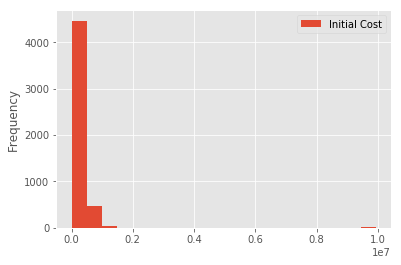

In [28]:
plumbing.plot(y = 'Initial Cost',kind='hist',bins=20)

In [18]:
## Detect some missingness
query = """select "Owner's Business Name", count(*) as count from jobs 
    where "Owner's Business Name"!=" " 
    group by "Owner's Business Name" 
    limit 1000"""
owner_counts = pd.read_sql_query(query,nyc_conn)

In [19]:
owner_counts.head()

,Owner's Business Name,count
0,# 1 DUMPLING,1
1,# 2 PALISA,1
2,# 3 Gamercy Park Ass.,1
3,#1 CHINESE,1
4,#1 CHINESE REST,1


In [29]:
owner_counts['count'].max()

2957

In [21]:
(owner_counts['count'] > 1000).sum()

2

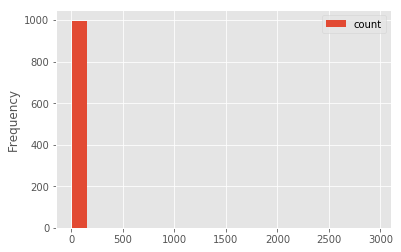

In [20]:
_ = owner_counts.plot(y="count",kind='hist',bins=20)